In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/%s'
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return


def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)

def rgba(color, alpha):
    return mpl.colors.to_rgba(color, alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

In [2]:
def cclab(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    numerator = '\\mathrm{P}_{%s \\times %s}(%s)'%(name1, name2, fn)
    denom = '\\mathrm{P}_{%s}(%s) \\mathrm{P}_{%s}(%s)'%(name1, fn, name2, fn)
    CORRCOEF = 'r $(%s)$ = $\\frac{%s}{\\sqrt{%s}}$'%(fn, numerator, denom)
    return CORRCOEF

def ccrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    out = 'r$_{%s}$ $(%s)$ / r$_{%s}$ $(%s)$'%(name1, fn, name2, fn)
    return out

def pkrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    return "P$_{%s}$ $(%s)$ / P$_{%s}$ $(%s)$"%(name1, fn, name2, fn)
XLAB = '$k$ (cMpc/h)$^{-1}$'

def pklab(name, fn = 'k', rm = True):
    if rm:
        name = '\\mathrm{%s}'%name
    return 'P$_{%s}$ ($%s$) (cMpc/h)$^{-3}$'%(name, fn)
    

In [3]:
ds = pkl.load(open('binth_coef.pkl', 'rb'))

In [4]:
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs((-1,-1), frameon = False, fontsize = 12)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', {'fontsize':16})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['blue', 'red', 'resolved'], [r'HI $\times$ Blue', r'HI $\times$ Red', r'HI $\times$ Galaxies'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
lowbin = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^8$'
midbin =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^9$'
highbin = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
bins = ['low-bin', 'mid-bin', 'high-bin']
threshs = ['low-threshold', 'mid-threshold', 'high-threshold']
ds.displayAs('HI_res', bins, [lowbin, midbin, highbin])
ds.setOrder('HI_res', bins + threshs + ['diemer'])
colors = seaborn.color_palette('copper', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('HI_res', bins[i], {'color':colors[i]})
    ds.plotArgs('HI_res', threshs[i], {'color':colors[i]})
ds.plotArgs('HI_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
midth =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('HI_res', threshs, [lowth, midth, highth])

lowbin = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^9$'
midbin =r'10$^9 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^{10}$'
highbin = r'10$^{10} \leq$ M$_{\star}$/M$_\odot$'
ds.displayAs('gal_res', bins, [lowbin, midbin, highbin])
ds.setOrder('gal_res', bins + threshs + ['diemer'])
colors = seaborn.color_palette('rocket', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('gal_res', bins[i], {'color':colors[i]})
    ds.plotArgs('gal_res', threshs[i], {'color':colors[i]})
ds.plotArgs('gal_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$'
midth =r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^{10} \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('gal_res', threshs, [lowth, midth, highth])

ds.displayAs('censat', ['centrals', 'satellites', 'both', 'centrals_both', 'satellites_both', 'both_satellites', 'both_centrals'],
            ['Central Galaxies', 'Satellite Galaxies', 'Both', 'HI in Centrals', 'HI in Satellites', 'Satellite Galaxies', 'Central Galaxies'])

# Making HI binth figure

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50, 33]
[('HI Mass Bins', [0.95, 0.95], (0, 3), {'color': 'darkgreen', 'ha': 'right', 'va': 'top', 'fontsize': 16})]


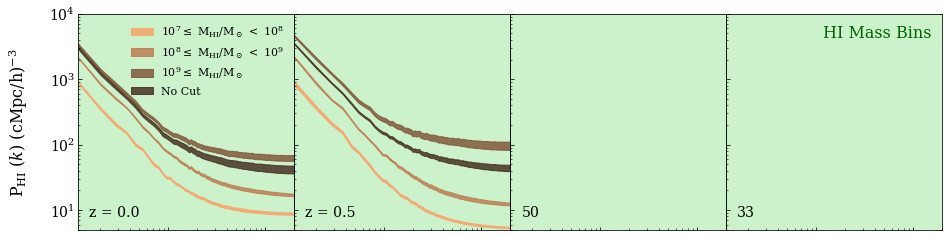

In [5]:
BINCOL = 'limegreen'
THCOL = 'deeppink'
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'snapshot':[99, 67, 50, 33]}
abfg = ds.figrid('HI_res', '', 'snapshot', ip)
abfg.plotArgs('diemer', {'label':'No Cut'})
abfg.autoFill({'alpha':0.8})
abfg.gspecArgs(wspace = 0, yborder = [0.05, 0.05])
abfg.setYLabel(pklab('HI'))
abfg.colLabels(pos = [0.05, 0.05])
abfg.colLabelArgs(ha = 'left', va = 'bottom')
# fg.setXLabel(XLAB)
abfg.setDefaultTicksParams()
abfg.tickArgs(labelbottom = False)
abfg.axisArgs(ylim = (5, 1e4), facecolor = rgba(BINCOL, 0.25))
abfg.legendArgs({'fontsize':11}, slc = (0, 0), loc = 'upper right')
abfg.annotatePanel('HI Mass Bins', [0.95, 0.95], (0, 3), color = 'darkgreen', 
                ha = 'right', va = 'top', fontsize = 16)
abfg.plot()
print(abfg.panel_annotations)

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50, 33]


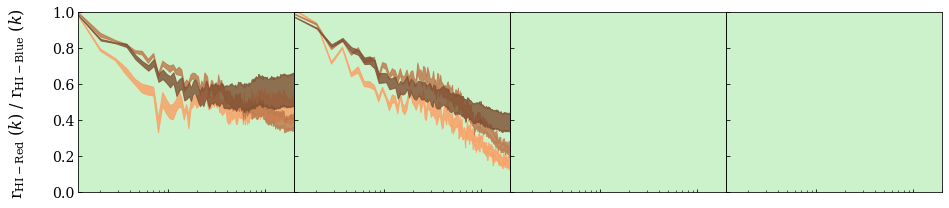

In [6]:
ip = {'path':'HIbt', 'censat':'both', 'HI_res':['low-bin', 'mid-bin', 'high-bin'],
     'is_auto':False, 'post_process':'corr_ratio', 'HI_fieldname':'hisubhalo', 'space':'real', 'snapshot':[99, 67, 50, 33]}
rbfg = ds.figrid("HI_res", '', 'snapshot', ip)
rbfg.autoFill(alpha = 0.8)
rbfg.gspecArgs(wspace = 0, yborder = [0.05, 0.25])
rbfg.setPanelsize(3, 2.5)
rbfg.axisArgs(yscale = 'linear', ylim = (0,1), facecolor = rgba(BINCOL, 0.25))
# fg.setXLabel(XLAB)
rbfg.setYLabel(ccrat("HI-Red", "HI-Blue"))
rbfg.legendArgs(rm_legend = True)
rbfg.setDefaultTicksParams()
rbfg.colLabels(['']*4)
# fg.annotatePanel('Galaxy Correlations\nBy HI Mass Bins', [0.95, 0.95], (0, 3), color = 'forestgreen', 
#                 ha = 'right', va = 'top', fontsize = 16)
rbfg.tickArgs(labelbottom = False)
rbfg.plot()

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50, 33]
[('HI Mass Thresholds', [0.95, 0.95], (0, 3), {'color': 'purple', 'ha': 'right', 'va': 'top', 'fontsize': 16})]
[('HI Mass Bins', [0.95, 0.95], (0, 3), {'color': 'darkgreen', 'ha': 'right', 'va': 'top', 'fontsize': 16})]


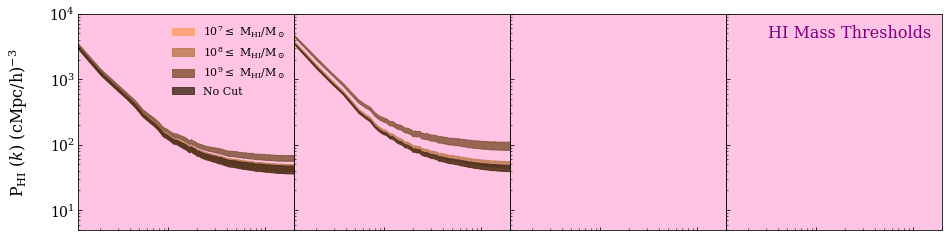

In [7]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'snapshot':[99, 67, 50, 33]}
atfg = ds.figrid('HI_res', '', 'snapshot', ip)
atfg.plotArgs('diemer', {'label':'No Cut'})
atfg.autoFill({'alpha':0.8})
atfg.gspecArgs(wspace = 0, yborder = [0.05, 0.05])
atfg.setYLabel(pklab('HI'))
atfg.colLabels(['']*4)
atfg.annotatePanel('HI Mass Thresholds', [0.95, 0.95], (0, 3), color = 'purple', 
                ha = 'right', va = 'top', fontsize = 16)
atfg.colLabels(pos = [0.05, 0.05])
atfg.colLabelArgs(ha = 'left', va = 'bottom')
# fg.setXLabel(XLAB)
atfg.setDefaultTicksParams()
atfg.tickArgs(labelbottom = False)
atfg.axisArgs(ylim = (5, 1e4), facecolor = rgba(THCOL, 0.25))
atfg.legendArgs({'fontsize':11}, slc = (0, 0), loc = 'upper right')
atfg.plot()
print(atfg.panel_annotations)
print(abfg.panel_annotations)

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50, 33]


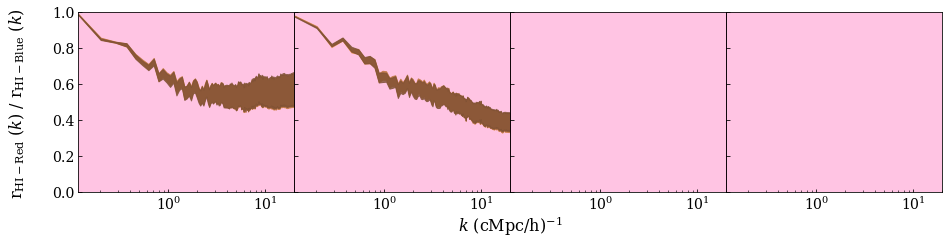

In [8]:
ip = {'path':'HIbt', 'censat':'both', 'HI_res':['low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':False, 'post_process':'corr_ratio', 'HI_fieldname':'hisubhalo', 'space':'real', 'snapshot':[99, 67, 50, 33]}
rtfg = ds.figrid("HI_res", '', 'snapshot', ip)
rtfg.autoFill(alpha = 0.8)
rtfg.gspecArgs(wspace = 0, yborder = [0.05, 0.25])
rtfg.setPanelsize(3, 2.5)
rtfg.axisArgs(yscale = 'linear', ylim = (0,1), facecolor = rgba(THCOL, 0.25))
rtfg.setXLabel(XLAB)
rtfg.setYLabel(ccrat("HI-Red", "HI-Blue"))
rtfg.legendArgs(rm_legend = True)
rtfg.setDefaultTicksParams()
rtfg.colLabels(['']*4)
rtfg.plot()

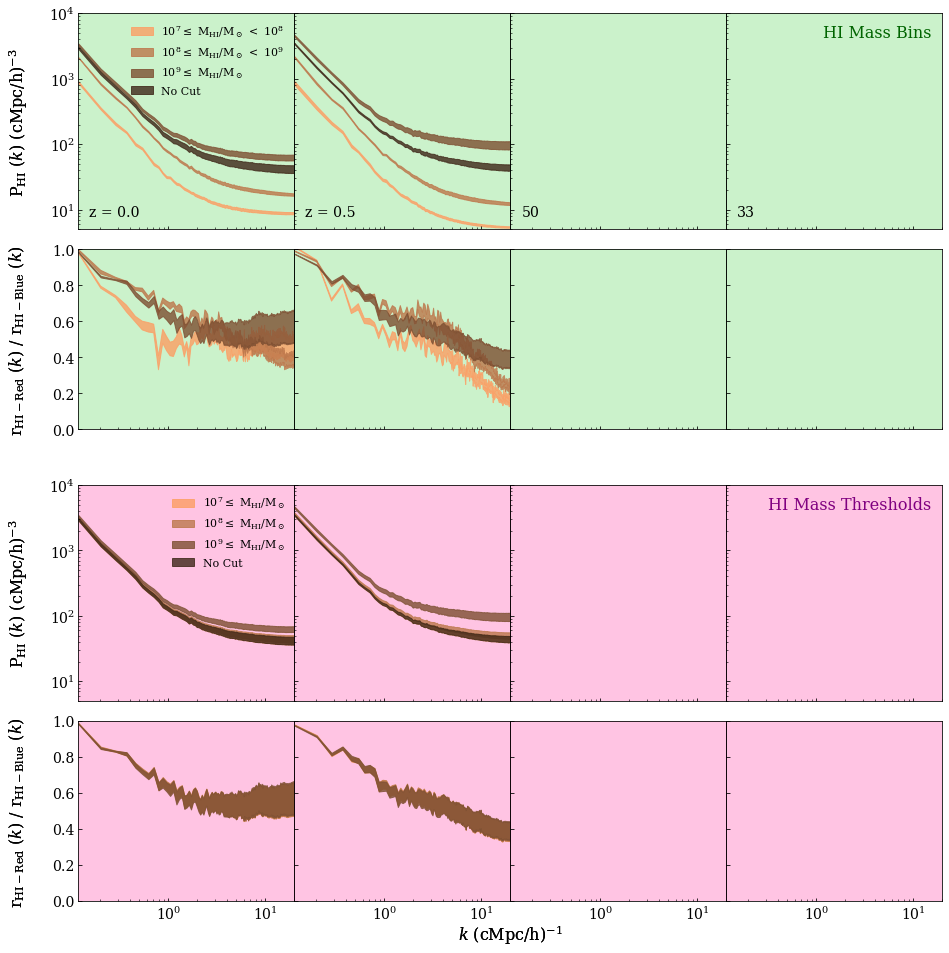

In [9]:
figarr = np.empty((4, 1), dtype = object)
figarr[:, 0] = [abfg, rbfg, atfg, rtfg]
fig = ds.combine(figarr)
# fig.savefig("HIbt_colors_snapshotC.png", bbox_inches = 'tight')
# fig.savefig(DRAFTPATH%"HIbt_colors_snapshotC.pdf", bbox_inches = 'tight')

# Making Stmass thresholds/bins figures

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67, 50, 33]


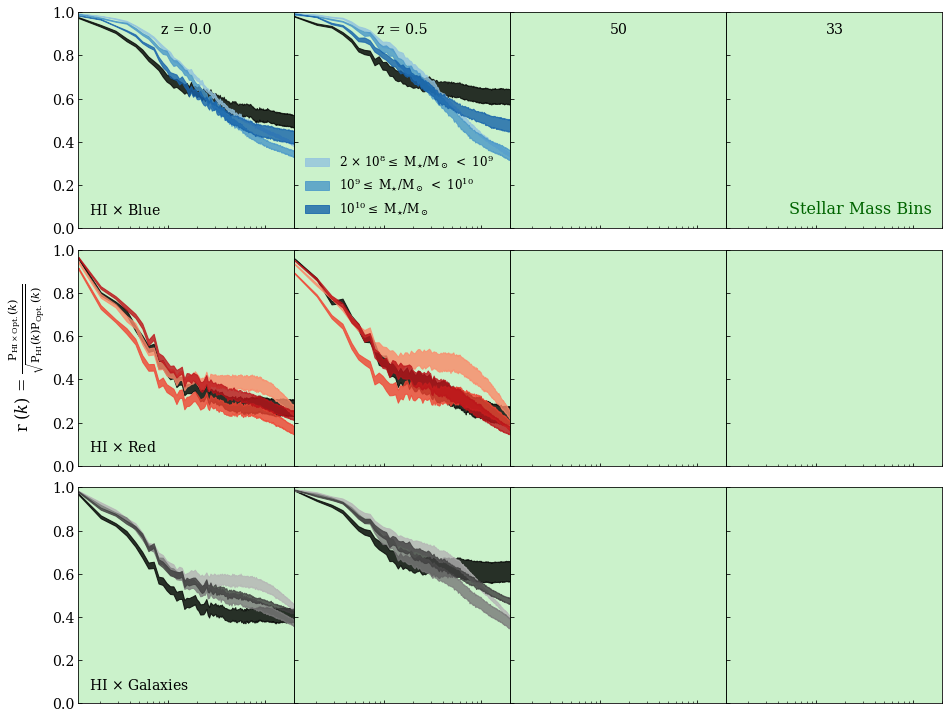

In [10]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo', 'snapshot':[99, 67, 50, 33]}
bfg = ds.figrid('gal_res', 'color', 'snapshot', ip)

gal_res = ip['gal_res'][:3]
# bfg.autoNorm('diemer', ['model'])
cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b+1]
        bfg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
        bfg.plotArgs('diemer', linestyle = '--', color = 'black', label = '_nolegend_')
# bfg.setYLabel(ccrat('Bin', 'Fid.'))
# bfg.setXLabel(XLAB)
bfg.setYLabel(cclab('HI', 'Opt.'))
bfg.setDefaultTicksParams()
bfg.tickArgs(labelbottom = False)
bfg.gspecArgs(wspace = 0, hspace = 0.1, yborder = [0, 0.25])
# bfg.legendArgs(loc = 'center', slc = (0, 1), fontsize = 12, bbox_to_anchor = (1, 1.35))
bfg.legendArgs(loc = 'lower left', slc = (0, 1), fontsize = 12)
bfg.axisArgs(yscale = 'linear', ylim = (0, 1), facecolor = rgba(BINCOL, 0.25))
bfg.autoFill(alpha = 0.8)
rbins = copy.deepcopy(bins)
rbins.reverse()
bfg.plotOrder(['diemer']+bins)
bfg.annotatePanel('Stellar Mass Bins', [0.95, 0.05], (0, 3), color = 'darkgreen', 
                ha = 'right', va = 'bottom', fontsize = 16)
bfg.plot()

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67, 50, 33]


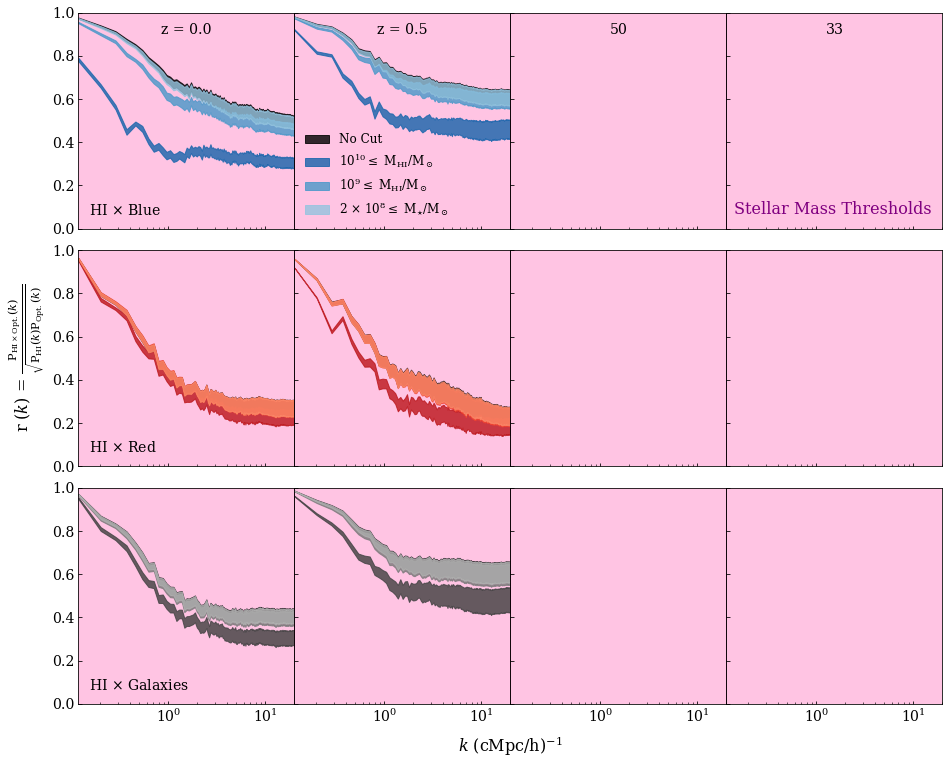

In [11]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':threshs + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo', 'snapshot':[99, 67, 50, 33]}
fg = ds.figrid('gal_res', 'color', 'snapshot', ip)

gal_res = ip['gal_res'][:3]
cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b+1]
        fg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
        fg.plotArgs('diemer', linestyle = '--', color = 'black')
# fg.setYLabel(ccrat('Thresh', 'Fid.'))
fg.setXLabel(XLAB)
fg.setYLabel(cclab('HI', 'Opt.'))
fg.setDefaultTicksParams()
fg.gspecArgs(wspace = 0, hspace = 0.1)
fg.legendArgs(loc = 'lower left', slc = (0, 1))
fg.axisArgs(yscale = 'linear', ylim = (0, 1), facecolor = rgba(THCOL, 0.25))
fg.autoFill(alpha = 0.8)
rbins = copy.deepcopy(threshs)
rbins.reverse()
fg.annotatePanel('Stellar Mass Thresholds', [0.95, 0.05], (0, 3), color = 'purple', 
                ha = 'right', va = 'bottom', fontsize = 16)
fg.plotOrder(['diemer']+rbins)
fg.plot()

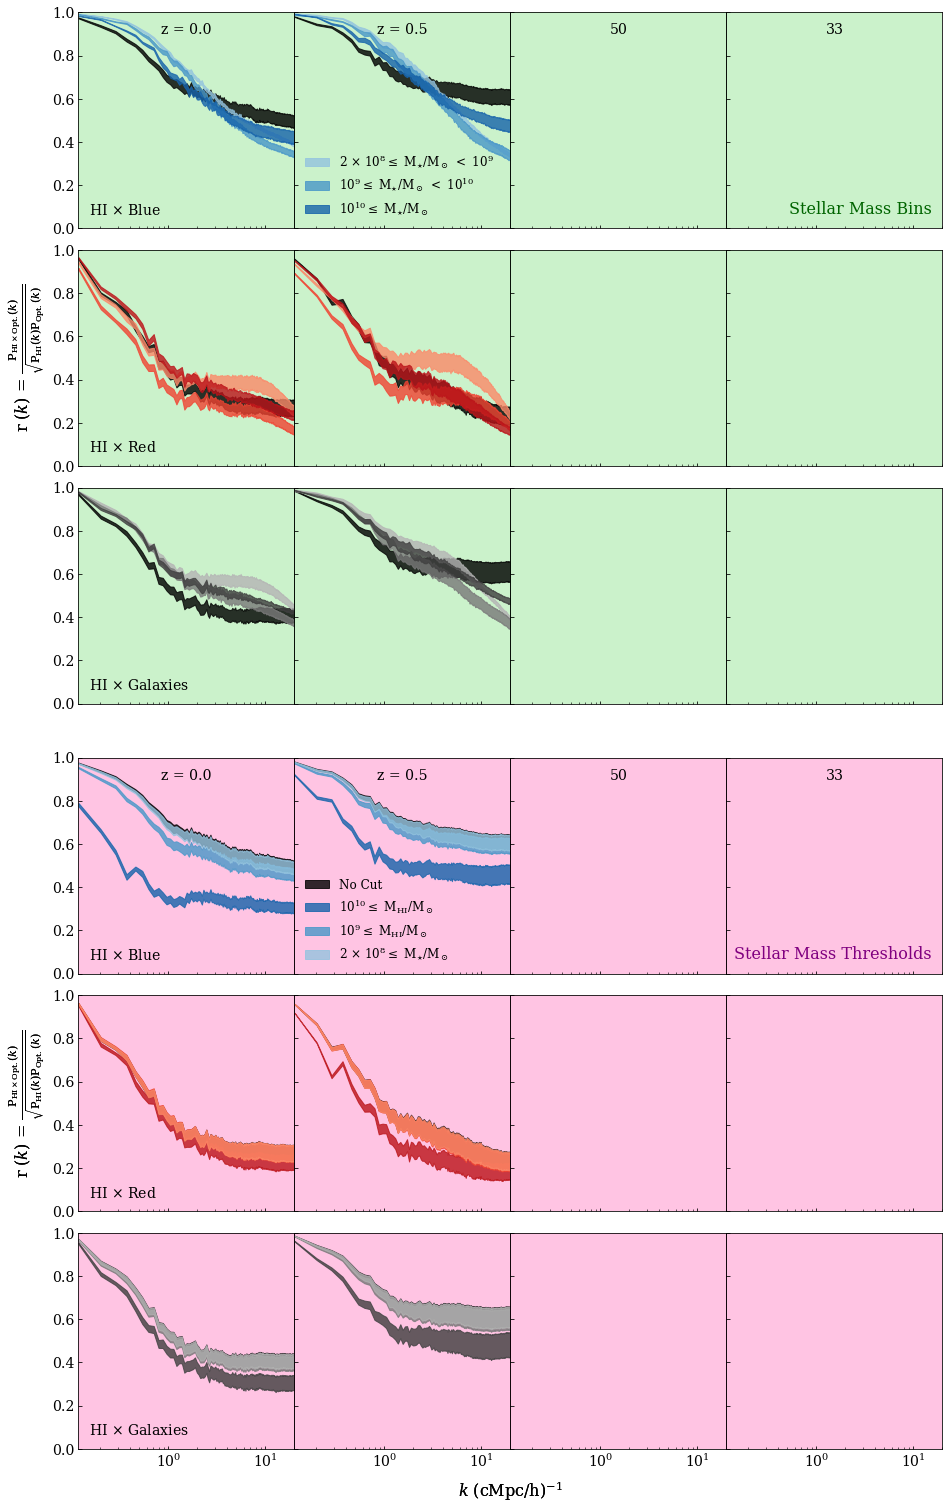

In [12]:
figarr = np.empty((2, 1), dtype = object)
figarr[:, 0]= [bfg, fg]
fig = ds.combine(figarr)
# fig.savefig(DRAFTPATH%"stmass_bins_snapshotC.pdf", bbox_inches = 'tight')
# fig.savefig("stmass_bins_snapshotC.png", bbox_inches = 'tight')

The row values for : ['no key found']
The column values for : ['no key found']


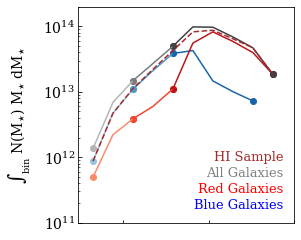

In [13]:
ip = {'is_hist':True, 'fieldname':'galaxy', 'is_hydrogen':False, 'censat':'both'}
def coolplot(ax, data, args):
    new_args = copy.deepcopy(args)
    cmaps['blue'] = seaborn.color_palette('Blues', 4)
    cmaps['red'] = seaborn.color_palette('Reds', 4)
    cmaps['gray'] = seaborn.color_palette('Greys', 4)
    
    cmap = cmaps[args['color']]
    idx = [0, 3, 5, len(data[0])]
    for i in range(3):
        new_args['color'] = cmap[i + 1]
        if i == 0: 
            x = data[0][idx[i]:idx[i+1]]
            y = data[1][idx[i]:idx[i+1]]
        else:
            x = data[0][idx[i]-1:idx[i+1]]
            y = data[1][idx[i]-1:idx[i+1]]

        mask = y > 0
        ax.plot(x[mask], y[mask], **new_args)
        ax.scatter([x[mask][0], x[mask][-1]], [y[mask][0], y[mask][-1]], color = new_args['color'])
    return
    
hgfg = ds.figrid('color', '', '', ip)
hgfg.tickArgs(labelbottom = False)

hgfg.gspecArgs(yborder = [0, 0.2])
hgfg.axisLabelArgs('y', fontsize = 14)
hgfg.setYLabel(r"$\int_{\mathrm{bin}}$ N(M$_{\rm{\star}}$) M$_{\rm{\star}}$ dM$_{\rm{\star}}$")
hgfg.setFunc({'is_hist':True}, coolplot)
hgfg.axisArgs(xlim = (9e7, 1e13), ylim = (1e11, 2e14))
texts = ['Blue Galaxies', 'Red Galaxies', 'All Galaxies', 'HI Sample']
colors = ['blue', 'red', 'gray', 'brown']
for i in range(4):
    hgfg.annotatePanel(texts[i], pos = [0.95, 0.05+0.075*i], idx = (0, 0), color = colors[i], fontsize = 13, va = 'bottom', ha = 'right')
hgfg.legendArgs(rm_legend = True)
hgfg.plot()

ip = {'is_hist':True, 'fieldname':'hisubhalo', 'gal_pop':True, 'is_hydrogen':'False'}
hihist = ds.getMatching(ip)[0]
zeromask = hihist.data[1] > 0
hgfg.axes[0,0].plot(hihist.data[0][zeromask], hihist.data[1][zeromask], color = 'brown', linestyle = 'dashed')
# hgfg.save("histogram_galaxies.png")
# hgfg.save(DRAFTPATH + "histogram_galaxies.pdf")

The row values for : ['no key found']
The column values for : ['no key found']


/home/cosinga/figrid/figrid/figrid.py:845: RuntimeWarning: invalid value encountered in true_divide
  dcdata[idx][:] = dcdata[idx][:] / norm[:]


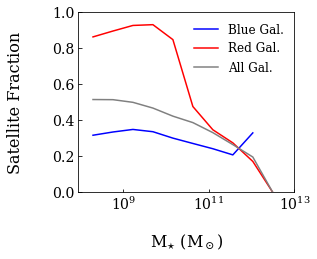

In [14]:
ip = {'is_hist':True, 'fieldname':'galaxy', 'is_hydrogen':False, 'censat':['both', 'satellites']}
fg = ds.figrid('censat', '', '', ip)
fg.autoNorm('both', ['color'])
fg.axisArgs(xlim = (9e7, 1e13), ylim = (0, 1), yscale = 'linear')
fg.plotArgs({'color':'blue'}, color = 'blue', label = 'Blue Gal.')
fg.plotArgs({'color':'red'}, color = 'red', label = 'Red Gal.')
fg.plotArgs({'color':'resolved'}, color = 'gray', label = 'All Gal.')
fg.plotArgs('both', label = '_nolegend_')
fg.setYLabel("Satellite Fraction")
fg.setXLabel(r"M$_{\mathrm{\star}}$ (M$_\odot$)")
fg.setPanelsize(3, 2.5)
fg.plot()

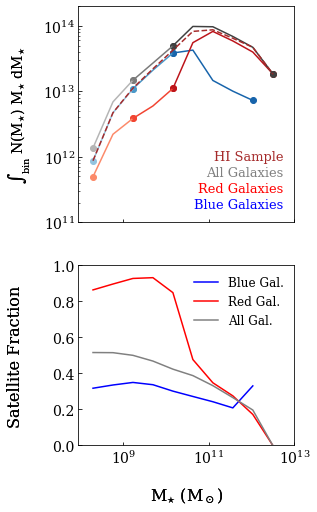

In [15]:
figarr = np.empty((2, 1), dtype = object)
figarr[0,0] = hgfg; figarr[1, 0] = fg

fig = ds.combine(figarr)
ip = {'is_hist':True, 'fieldname':'hisubhalo', 'gal_pop':True, 'is_hydrogen':'False'}
hihist = ds.getMatching(ip)[0]
zeromask = hihist.data[1] > 0
hgfg.axes[0,0].plot(hihist.data[0][zeromask], hihist.data[1][zeromask], color = 'brown', linestyle = 'dashed')
# fig.savefig(DRAFTPATH%"histograms.pdf", bbox_inches ='tight')
# fig.savefig("histograms.png", bbox_inches = 'tight')

The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


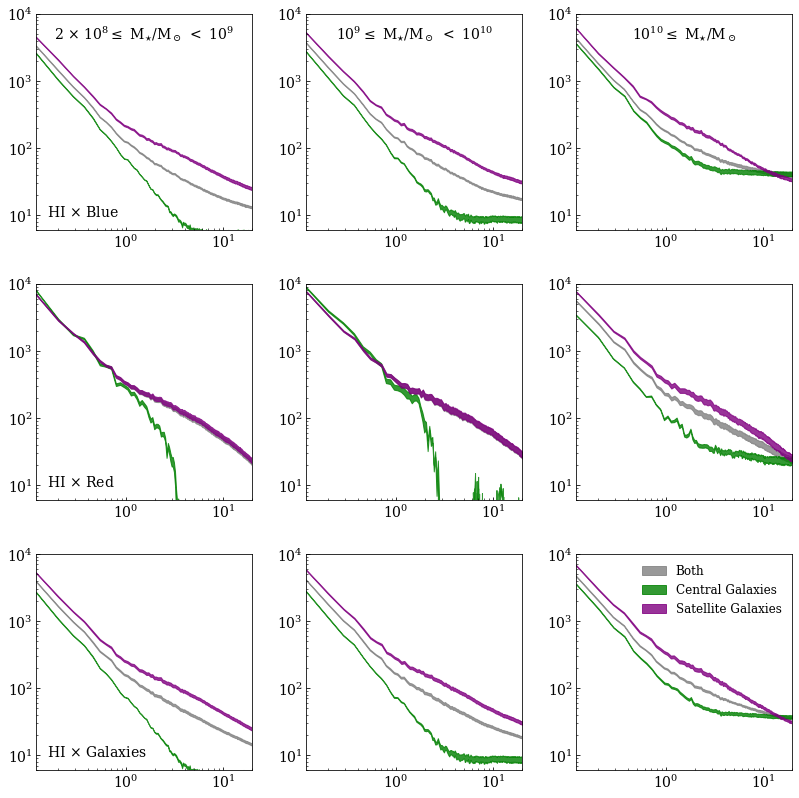

In [16]:
ip = {'is_auto':False, 'censat':['both_satellites', 'both_centrals', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':'galbt', 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'snapshot':67, 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('censat', 'color', 'gal_res', ip)
blue_colors = seaborn.color_palette("mako", 3)
fg.plotArgs('both', color = 'gray', label = 'Both')
fg.plotArgs('both_satellites', color = 'purple', label = 'Satellite Galaxies')
fg.plotArgs('both_centrals', color = 'green', label = 'Central Galaxies')
fg.autoFill()
fg.axisArgs(ylim = (6, 1e4))
fg.plot()